# Credit Card Fraud Detection

## Objective
Identify **fraudulent credit card transactions** using machine learning.

## Dataset Overview
The dataset contains anonymized credit card transactions labeled as fraud or not.

- `Time`, `Amount`, and anonymized features `V1` to `V28`
- `Class`: 1 for fraud, 0 for non-fraud

## Workflow
1. Load and explore the dataset
2. Handle class imbalance
3. Feature scaling and model training
4. Evaluate performance

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay


In [2]:
# Load the dataset
df = pd.read_csv("E:\\Skillfied mentor\\downloaded-file2\\creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Exploratory Data Analysis

In [5]:
# checking skewness
amount_skewness=df['Amount'].skew()
amount_skewness

np.float64(16.977724453761006)

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# Count of fraud vs non-fraud
Total_Fraud= df['Class'].sum()
Total_class_count=df['Class'].count()
Total_non_Fraud= Total_class_count - Total_Fraud
Total_non_Fraud
print("Total Fraud:", Total_Fraud)
print("Total non- Fraud:", Total_non_Fraud)

Total Fraud: 492
Total non- Fraud: 284315


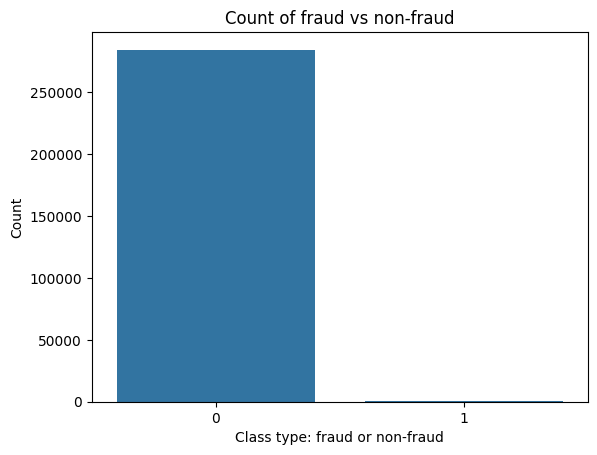

In [8]:
sns.countplot(x='Class', data=df)
plt.title("Count of fraud vs non-fraud")
plt.xlabel("Class type: fraud or non-fraud")
plt.ylabel("Count")
plt.show()

In [9]:
# Correlation heatmap
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


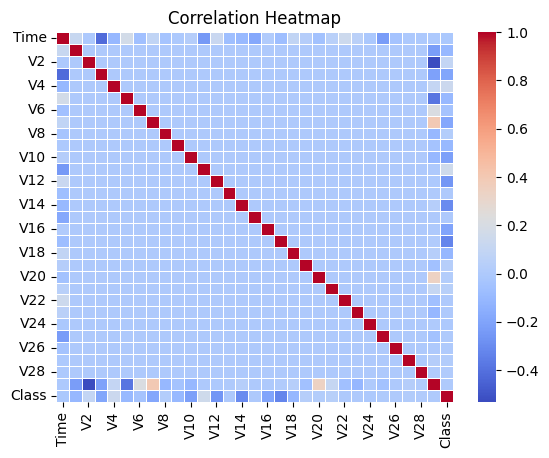

In [10]:
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Data Preprocessing

In [11]:
# checking skewness
amount_skewness=df['Amount'].skew()
print("amount skewness", amount_skewness)
time_skewness=df['Time'].skew()
print("Time skewness", time_skewness)

amount skewness 16.977724453761006
Time skewness -0.03556761800632167


In [12]:
#Treat Skewness
df['Sqr_amount']=df['Amount']**(1/7.8)
df['Sqr_amount'].skew()

np.float64(0.0024432077571107436)

In [13]:
#Treat Skewness
df['Sqr_time']=df['Time']**(1.1)
df['Sqr_time'].skew()

np.float64(0.030872850352100977)

In [14]:
# Feature scaling for 'Amount' and 'Time'
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df['scal_time']=min_max.fit_transform(df[['Sqr_time']])
df['scal_amount']=min_max.fit_transform(df[['Sqr_amount']])


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 35 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Time         284807 non-null  float64
 1   V1           284807 non-null  float64
 2   V2           284807 non-null  float64
 3   V3           284807 non-null  float64
 4   V4           284807 non-null  float64
 5   V5           284807 non-null  float64
 6   V6           284807 non-null  float64
 7   V7           284807 non-null  float64
 8   V8           284807 non-null  float64
 9   V9           284807 non-null  float64
 10  V10          284807 non-null  float64
 11  V11          284807 non-null  float64
 12  V12          284807 non-null  float64
 13  V13          284807 non-null  float64
 14  V14          284807 non-null  float64
 15  V15          284807 non-null  float64
 16  V16          284807 non-null  float64
 17  V17          284807 non-null  float64
 18  V18          284807 non-

In [16]:
# Drop original columns # Rearranging columns
df.drop(['Time', 'Amount', 'Sqr_amount', 'Sqr_time'], axis=1, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   V1           284807 non-null  float64
 1   V2           284807 non-null  float64
 2   V3           284807 non-null  float64
 3   V4           284807 non-null  float64
 4   V5           284807 non-null  float64
 5   V6           284807 non-null  float64
 6   V7           284807 non-null  float64
 7   V8           284807 non-null  float64
 8   V9           284807 non-null  float64
 9   V10          284807 non-null  float64
 10  V11          284807 non-null  float64
 11  V12          284807 non-null  float64
 12  V13          284807 non-null  float64
 13  V14          284807 non-null  float64
 14  V15          284807 non-null  float64
 15  V16          284807 non-null  float64
 16  V17          284807 non-null  float64
 17  V18          284807 non-null  float64
 18  V19          284807 non-

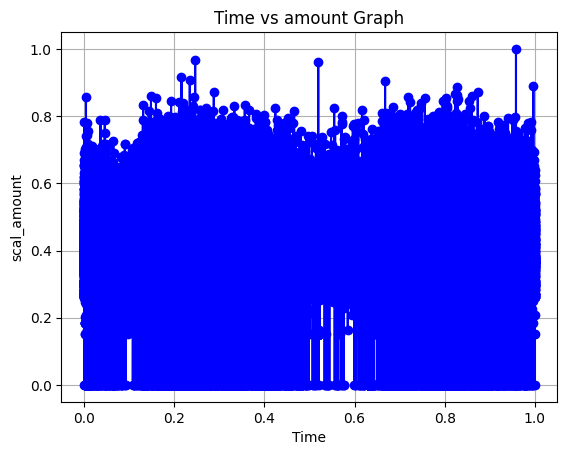

In [30]:
plt.plot(df['scal_time'], df['scal_amount'], marker='o', linestyle='-', color='blue')
plt.title("Time vs amount Graph")
plt.xlabel("Time")
plt.ylabel("scal_amount")
plt.grid(True)
plt.show()


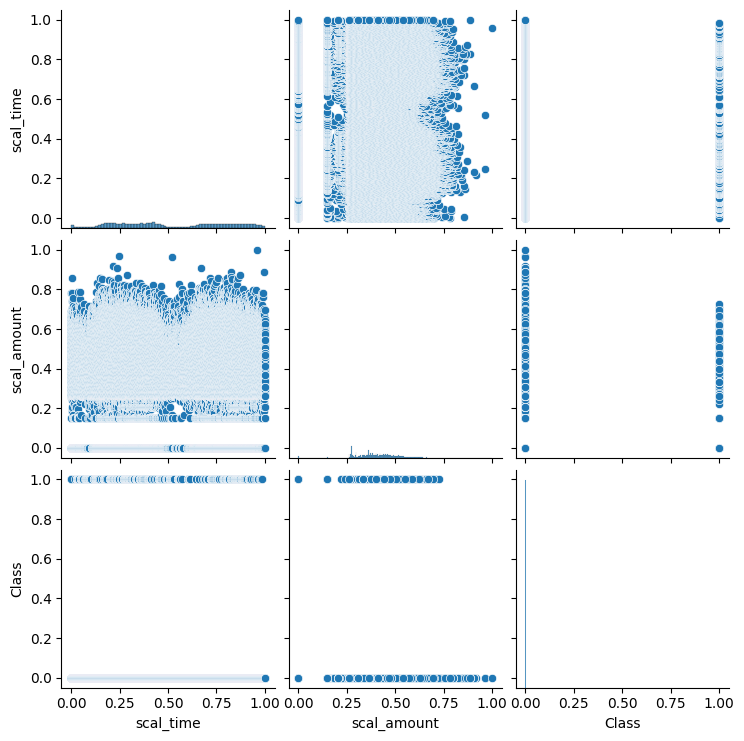

In [29]:
column_for_pairplot=df[['scal_time','scal_amount','Class']]
sns.pairplot(column_for_pairplot)
plt.show()

## Model Training

In [17]:
# Define features and target
X = df[['V1', 'V2', 'V3', 'V4', 'V5','V6', 'V7', 'V8', 'V9', 'V10','V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V27', 'scal_time', 'scal_amount']]
y = df['Class']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Show the result
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)
print("Training set size:", y_train.shape)
print("Testing set size:", y_test.shape)


Training set size: (227845, 30)
Testing set size: (56962, 30)
Training set size: (227845,)
Testing set size: (56962,)


Model Training

In [18]:
# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)
model

LogisticRegression()

In [19]:
# Predictions
y_prediction_train=model.predict(X_train)
y_prediction_test=model.predict(X_test)

## Evaluation

In [20]:
# Mean squared error
from sklearn.metrics import mean_squared_error
print("MSE for train data", mean_squared_error(y_train, y_prediction_train))
print("MSE for test data", mean_squared_error(y_test, y_prediction_test))

# Root mean squared error
print("RMSE for train data", np.sqrt(mean_squared_error(y_train, y_prediction_train)))
print("RMSE for test data", np.sqrt(mean_squared_error(y_test, y_prediction_test)))


MSE for train data 0.0007329544207685049
MSE for test data 0.0008602226045433798
RMSE for train data 0.02707313097461217
RMSE for test data 0.029329551727624133


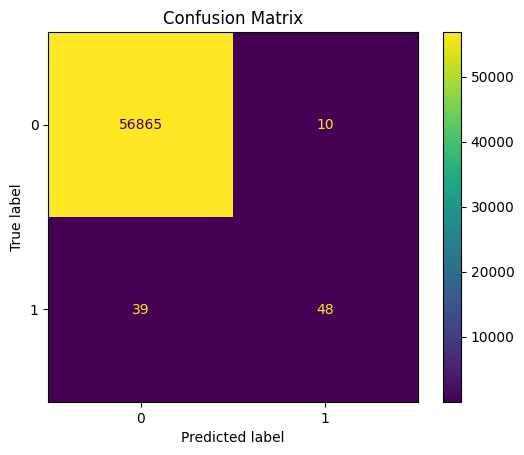

In [21]:
# Confusion matrix and classification report
#y_test: actual labels
#y_pred: predicted labels
cm = confusion_matrix(y_test, y_prediction_test)

# Display matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()


In [22]:
# --- 2. Classification Report ---
print("Classification Report:\n")
print(classification_report(y_test, y_prediction_test))

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.83      0.55      0.66        87

    accuracy                           1.00     56962
   macro avg       0.91      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962



In [23]:
##Coef. of determination
from sklearn.metrics import r2_score
print("R2 for train data", r2_score(y_train, y_prediction_train))
print("R2 for test data", r2_score(y_test, y_prediction_test))

R2 for train data 0.5869200614027088
R2 for test data 0.4359200707338641


Check lists

In [24]:
#1. Is overfitting or underfitting
        # Train accuracy is 0.58 which is almost same as test accuracy 0.43 so we can confirm that it is a good model
#2. Test accuracy and Cross Validation Score (CV score)
from sklearn.model_selection import cross_val_score
scores= cross_val_score(model, X, y, cv=5) #CV --> data divided into 5 records/ fold
print("scores",scores)

cv_scores= scores.mean()
print("Cross Validation Score is:", cv_scores)


scores [0.99913978 0.99935044 0.99894665 0.99926265 0.99903443]
Cross Validation Score is: 0.9991467899432187


## Conclusion
- Used logistic regression for binary classification.
- Addressed feature scaling and class imbalance.
- Future work: try ensemble methods (e.g. Random Forest, XGBoost) or SMOTE for better fraud detection.

In [35]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_test_RF = rf_model.predict(X_test)



Confusion Matrix:
 [[56870     5]
 [   21    66]]


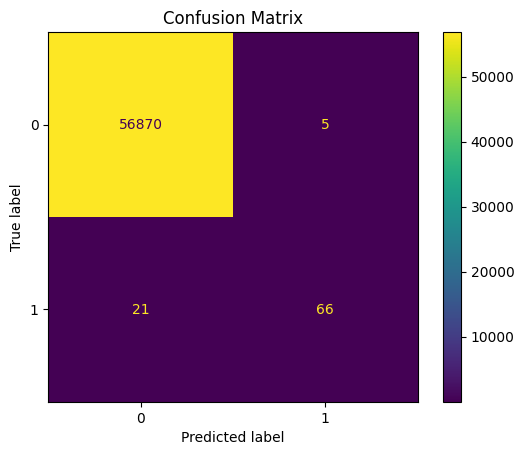


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.93      0.76      0.84        87

    accuracy                           1.00     56962
   macro avg       0.96      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [36]:
# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test_RF))
cm_RFC = confusion_matrix(y_test, y_pred_test_RF)

# Display matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_RFC)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred_test_RF))

In [37]:
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
print(feature_importance.sort_values(ascending=False))


V17            0.196484
V14            0.144278
V12            0.112778
V10            0.067806
V16            0.066301
V11            0.057199
V9             0.036565
V4             0.028055
V7             0.025663
V18            0.022771
V3             0.017863
V21            0.017480
V26            0.017426
V6             0.014844
V1             0.013434
V20            0.013424
V19            0.012739
scal_time      0.012638
V27            0.012431
V8             0.011858
V2             0.011434
V22            0.010877
V27            0.010826
V15            0.010718
scal_amount    0.010470
V5             0.009947
V13            0.009607
V24            0.008300
V25            0.008253
V23            0.007532
dtype: float64
